In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

%matplotlib inline
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
from pickle import dump
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


# Data processing

In [97]:

TRAIN_DIR = 'train'
INPUT_DIR = '../input/dogs-vs-cats'


In [98]:
import zipfile

zip_files = ['train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

train unzipped


In [99]:
file_names = os.listdir(TRAIN_DIR)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [100]:
filenames = os.listdir(TRAIN_DIR)
filenames[:5]

['dog.7246.jpg',
 'dog.311.jpg',
 'dog.1367.jpg',
 'cat.9096.jpg',
 'dog.11643.jpg']

In [101]:
labels = [1 if filename.startswith('dog') else 0 for filename in filenames]

labels[:5]

[1, 1, 1, 0, 1]

In [102]:
df = pd.DataFrame({
    'filename': filenames,
    'category': labels
})

df.head()

,filename,category
0,dog.7246.jpg,1
1,dog.311.jpg,1
2,dog.1367.jpg,1
3,cat.9096.jpg,0
4,dog.11643.jpg,1


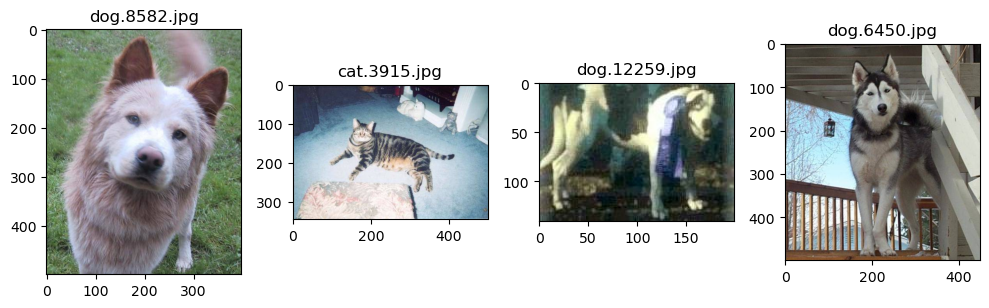

In [103]:
random_images = random.sample(list(df['filename']), 4)
fig, axes = plt.subplots(1, 4, figsize=(10, 8))
axes = axes.ravel()

for i, filename in enumerate(random_images):
    image = mpimg.imread("{}/{}".format(TRAIN_DIR, filename))
    axes[i].imshow(image)
    axes[i].set_title((filename))
    axes[i].axis('on')

plt.tight_layout()
plt.show()

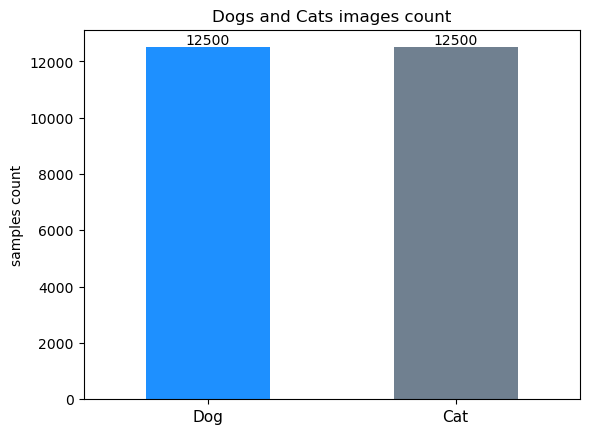

In [104]:
ax = df.category.value_counts().plot.bar(color=['dodgerblue', 'slategray'])
plt.title('Dogs and Cats images count')
plt.ylabel('samples count')

ax.set_xticklabels(['Dog', 'Cat'], rotation=0, fontsize=11)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [105]:
def load_images_from_dir(dir_location, filenames):
    return [np.array(Image.open('{}/{}'.format(dir_location, filename)).resize((64, 64))) for filename in filenames]

images = np.array(load_images_from_dir(TRAIN_DIR, filenames))

In [106]:
images.shape

(25000, 64, 64, 3)

[22806 20728   279 14018]
22806    1
20728    0
279      1
14018    0
Name: category, dtype: int64


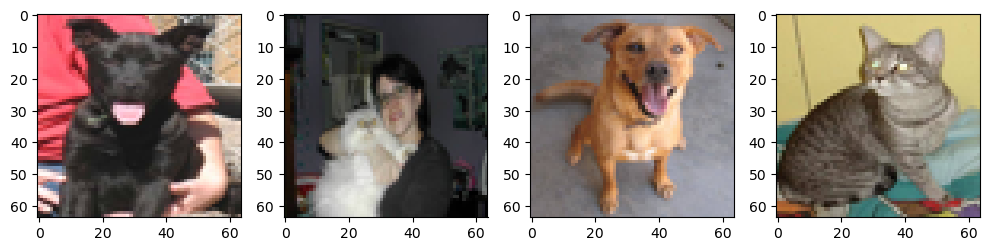

In [107]:
random_indices = np.random.choice(images.shape[0], size=4, replace=False)
print(random_indices)
random_images = images[random_indices]
labels = df['category']
label = labels[random_indices]
print(label)
fig, axes = plt.subplots(1, 4,  figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i])
    ax.axis('on')

plt.tight_layout()

plt.show()

## Data processing

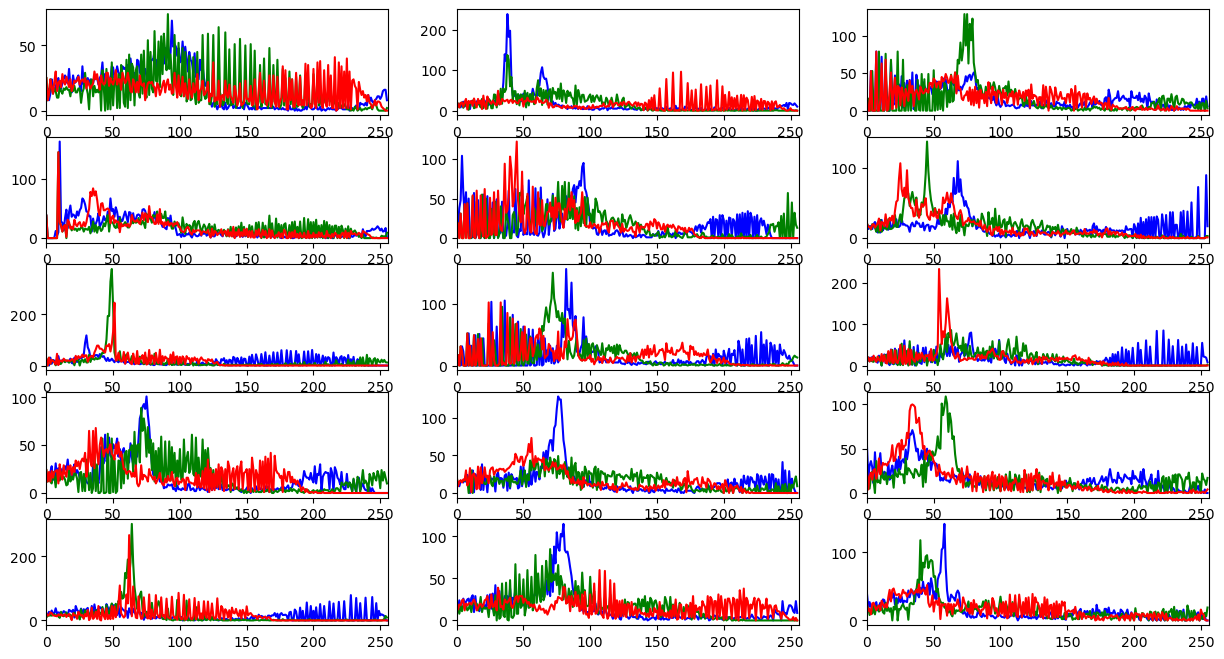

In [133]:
columns = 3
show = 15
plt.figure(figsize=(15, 8))

for idx in range(show):
    img = images[idx]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
    eq_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


    plt.subplot(int(np.ceil(show / columns) ), columns, idx + 1)
    for i,col in enumerate(color):
        histr = cv2.calcHist([eq_color],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
plt.show()


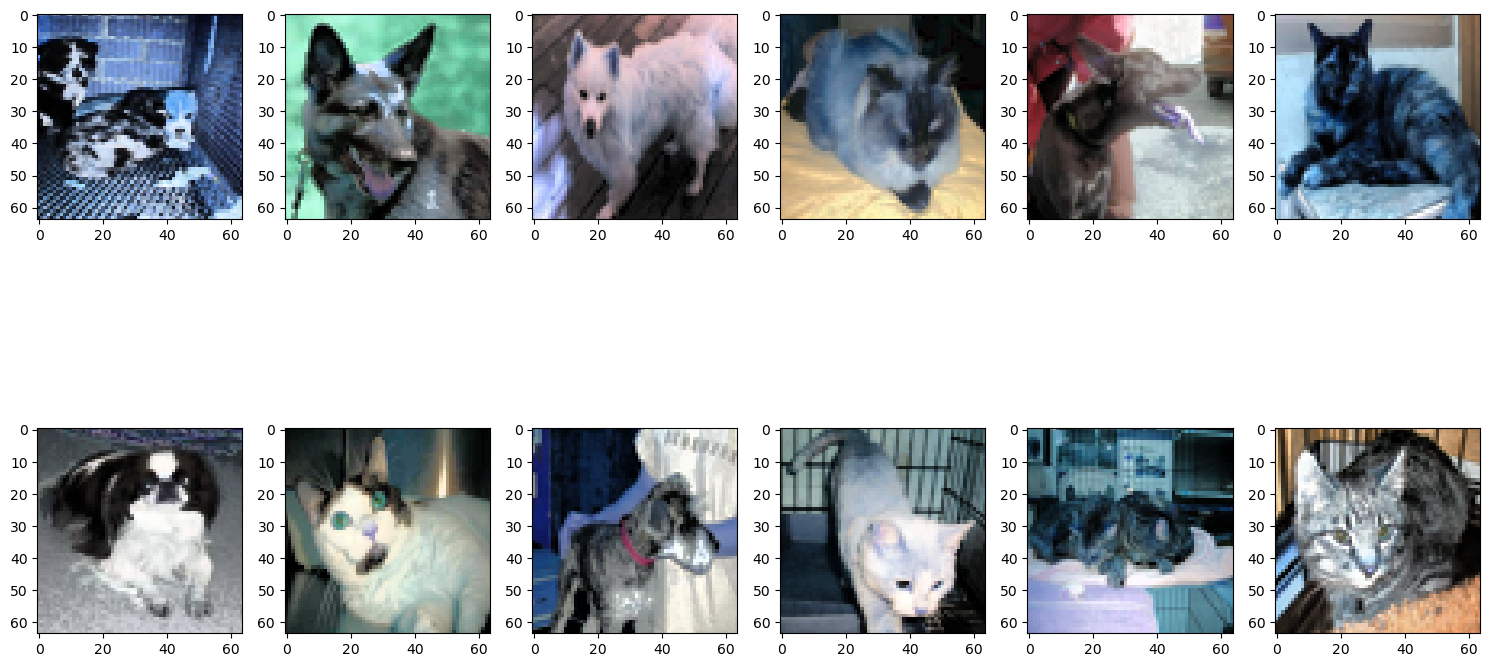

In [139]:
columns = 6
show = 12
plt.figure(figsize=(15, 10))

for idx in range(show):
    img = images[idx]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
    eq_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    plt.subplot(int(np.ceil(show / columns) ), columns, idx + 1)
    plt.imshow(eq_color)
    
plt.tight_layout()
plt.show()

In [110]:
def hist_eq(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
    eq_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return  cv2.resize(eq_color, (64,64)).flatten() 

In [111]:
rawImages = []
for i in range(len(images)):
    img=images[i]
    hist = hist_eq(img)
    rawImages.append(hist)

np.shape(rawImages)

(25000, 12288)

## Split this dataset into 10,000 images for training and 5,000 images for testing.

In [112]:
from sklearn.model_selection import train_test_split

labels = df['category']

train_images, test_images, train_labels, test_labels = train_test_split(rawImages, labels, test_size=5000, random_state=42, stratify=labels)

train_images1 = train_images[:10000]
train_labels1 = train_labels[:10000]

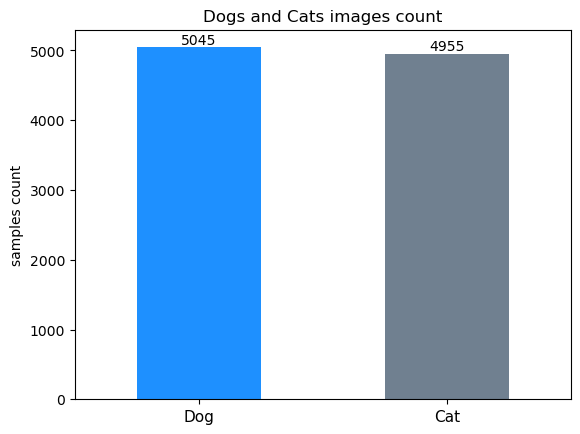

In [113]:
ax = train_labels1.value_counts().plot.bar(color=['dodgerblue', 'slategray'])
plt.title('Dogs and Cats images count')
plt.ylabel('samples count')
ax.set_xticklabels(['Dog', 'Cat'], rotation=0, fontsize=11)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


# Models

## DT

In [114]:
np.shape(train_images1)

(10000, 12288)

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(train_images1, train_labels1)

pred = clf.predict(test_images)

DT_accuracy = accuracy_score(test_labels, pred)
DT_report = classification_report(test_labels, pred)
DT_matrix = confusion_matrix(test_labels, pred)

print(f"Accuracy: {DT_accuracy}")
print("Classification Report:")
print(DT_report)
print("Confusion Matrix:")
print(DT_matrix)


Accuracy: 0.579
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      2500
           1       0.57      0.66      0.61      2500

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

Confusion Matrix:
[[1252 1248]
 [ 857 1643]]


## KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# h, w, d = train_images1[0].shape
# images_resized = np.array([np.reshape(img, (w*h*d)) for img in train_images1])
# test_images_resized = np.array([np.reshape(img, (w*h*d)) for img in test_images])


knn = KNeighborsClassifier(n_neighbors=158,n_jobs=-1)  
knn.fit(train_images1, train_labels1)


pred = knn.predict(test_images)


KNN_accuracy = accuracy_score(test_labels, pred)
KNN_report = classification_report(test_labels, pred)
KNN_matrix = confusion_matrix(test_labels, pred)

print(f"Accuracy: {KNN_accuracy}")
print("Classification Report:")
print(KNN_report)
print("Confusion Matrix:")
print(KNN_matrix)


Accuracy: 0.5922
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.88      0.68      2500
           1       0.72      0.30      0.42      2500

    accuracy                           0.59      5000
   macro avg       0.64      0.59      0.55      5000
weighted avg       0.64      0.59      0.55      5000

Confusion Matrix:
[[2209  291]
 [1748  752]]


## SGD

In [117]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sgd = SGDClassifier()
sgd.fit(train_images1, train_labels1)

pred = sgd.predict(test_images)

SGD_accuracy = accuracy_score(test_labels, pred)
SGD_report = classification_report(test_labels, pred)
SGD_matrix = confusion_matrix(test_labels, pred)

print(f"Accuracy: {SGD_accuracy}")
print("Classification Report:")
print(SGD_report)
print("Confusion Matrix:")
print(SGD_matrix)


Accuracy: 0.5426
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      2500
           1       0.54      0.57      0.55      2500

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.54      0.54      0.54      5000

Confusion Matrix:
[[1293 1207]
 [1080 1420]]


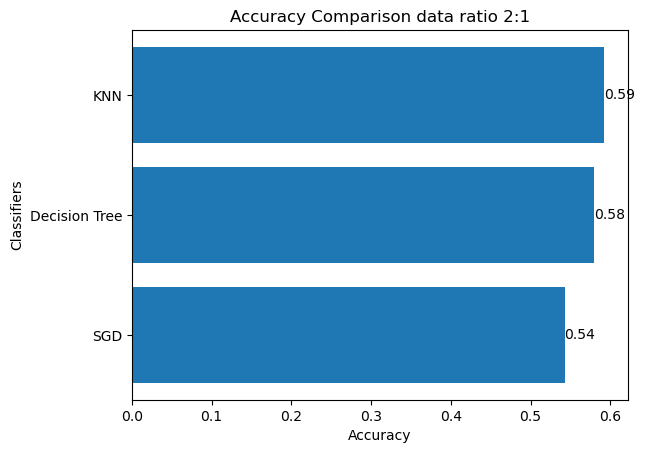

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns


accuracy_scores = [DT_accuracy, KNN_accuracy, SGD_accuracy]
classifiers = ['Decision Tree', 'KNN', 'SGD']
accuracy_scores_sorted = sorted(accuracy_scores)
classifiers_sorted = [x for _, x in sorted(zip(accuracy_scores, classifiers))]

plt.barh(classifiers_sorted, accuracy_scores_sorted)
plt.title('Accuracy Comparison data ratio 2:1')
plt.xlabel('Accuracy')
plt.ylabel('Classifiers')

for i, v in enumerate(accuracy_scores_sorted):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center')

plt.show()

In [119]:
print("Decision Tree Report:")
print(DT_report)
print("KNN Report:")
print(KNN_report)
print("SGD Report:")
print(SGD_report)

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      2500
           1       0.57      0.66      0.61      2500

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

KNN Report:
              precision    recall  f1-score   support

           0       0.56      0.88      0.68      2500
           1       0.72      0.30      0.42      2500

    accuracy                           0.59      5000
   macro avg       0.64      0.59      0.55      5000
weighted avg       0.64      0.59      0.55      5000

SGD Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      2500
           1       0.54      0.57      0.55      2500

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.54     

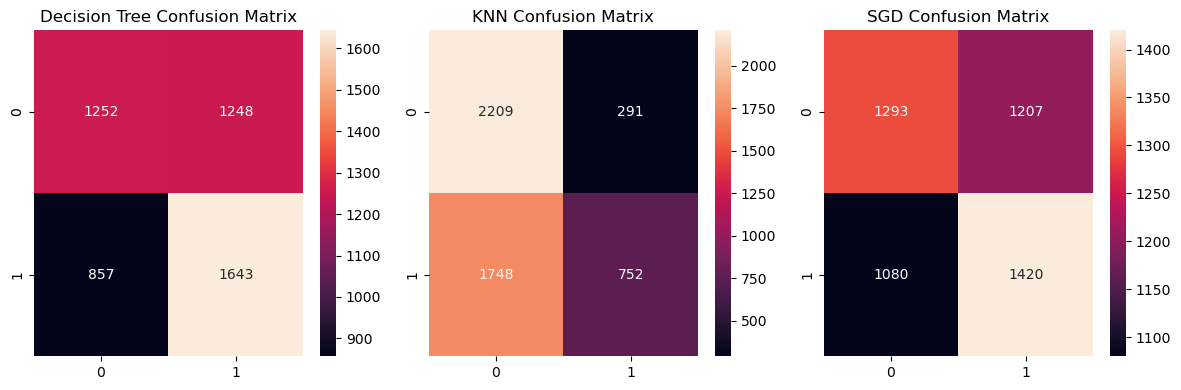

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.heatmap(DT_matrix, annot=True, fmt='d', ax=axes[0])
sns.heatmap(KNN_matrix, annot=True, fmt='d', ax=axes[1])
sns.heatmap(SGD_matrix, annot=True, fmt='d', ax=axes[2])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('KNN Confusion Matrix')
axes[2].set_title('SGD Confusion Matrix')
plt.tight_layout()
plt.show()

## double the number of training images to 20,000

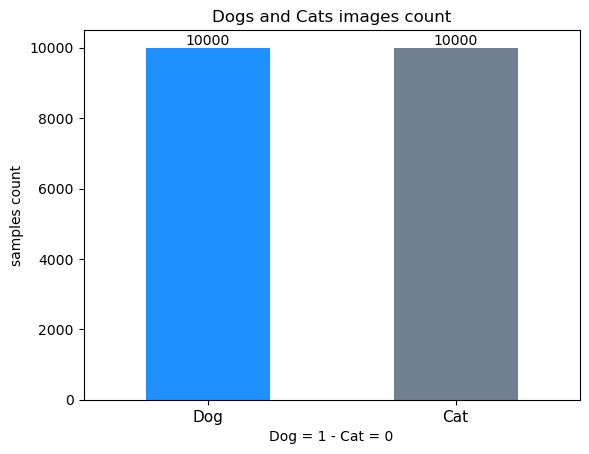

In [121]:
ax = train_labels.value_counts().plot.bar(color=['dodgerblue', 'slategray'])
plt.title('Dogs and Cats images count')
plt.xlabel('Dog = 1 - Cat = 0')
plt.ylabel('samples count')
ax.set_xticklabels(['Dog', 'Cat'], rotation=0, fontsize=11)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [122]:
################## DT

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(train_images, train_labels)

pred = clf.predict(test_images)

DT_accuracy2 = accuracy_score(test_labels, pred)
DT_report2 = classification_report(test_labels, pred)
DT_matrix2 = confusion_matrix(test_labels, pred)

print(f"Accuracy: {DT_accuracy2}")
print("Classification Report:")
print(DT_report2)
print("Confusion Matrix:")
print(DT_matrix2)
print()

####################### KNN

knn = KNeighborsClassifier(n_neighbors=158)  
knn.fit(train_images, train_labels)

pred = knn.predict(test_images)

KNN_accuracy2 = accuracy_score(test_labels, pred)
KNN_report2 = classification_report(test_labels, pred)
KNN_matrix2 = confusion_matrix(test_labels, pred)

print(f"Accuracy: {KNN_accuracy2}")
print("Classification Report:")
print(KNN_report2)
print("Confusion Matrix:")
print(KNN_matrix2)
print()

###################### SGD

sgd = SGDClassifier()
sgd.fit(train_images, train_labels)

pred = sgd.predict(test_images)

SGD_accuracy2 = accuracy_score(test_labels, pred)
SGD_report2 = classification_report(test_labels, pred)
SGD_matrix2 = confusion_matrix(test_labels, pred)

print(f"Accuracy: {SGD_accuracy2}")
print("Classification Report:")
print(SGD_report2)
print("Confusion Matrix:")
print(SGD_matrix2)

Accuracy: 0.5758
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      2500
           1       0.58      0.58      0.58      2500

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

Confusion Matrix:
[[1436 1064]
 [1057 1443]]

Accuracy: 0.6004
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.88      0.69      2500
           1       0.72      0.32      0.45      2500

    accuracy                           0.60      5000
   macro avg       0.64      0.60      0.57      5000
weighted avg       0.64      0.60      0.57      5000

Confusion Matrix:
[[2190  310]
 [1688  812]]

Accuracy: 0.5466
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.86      0.66      2500
           1       0.63  

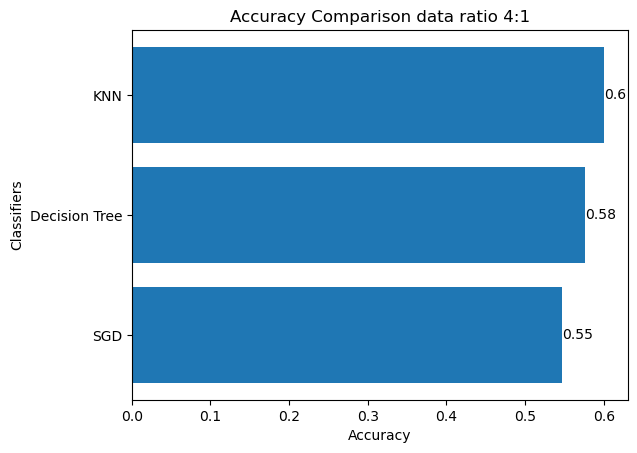

In [123]:
accuracy_scores = [DT_accuracy2, KNN_accuracy2, SGD_accuracy2]
classifiers = ['Decision Tree', 'KNN', 'SGD']
accuracy_scores_sorted = sorted(accuracy_scores)
classifiers_sorted = [x for _, x in sorted(zip(accuracy_scores, classifiers))]

plt.barh(classifiers_sorted, accuracy_scores_sorted)
plt.title('Accuracy Comparison data ratio 4:1')
plt.xlabel('Accuracy')
plt.ylabel('Classifiers')

for i, v in enumerate(accuracy_scores_sorted):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center')

plt.show()

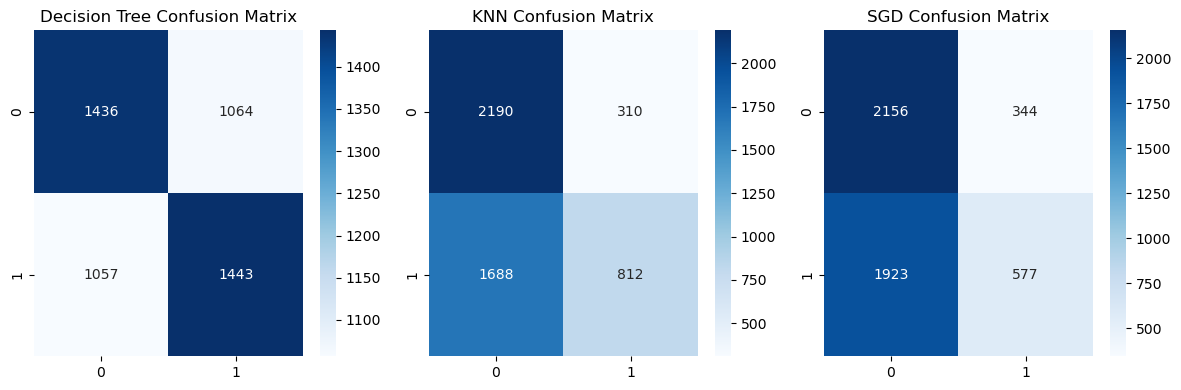

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
cmap = 'Blues'

sns.heatmap(DT_matrix2, annot=True, fmt='d', ax=axes[0], cmap=cmap)
sns.heatmap(KNN_matrix2, annot=True, fmt='d', ax=axes[1], cmap=cmap)
sns.heatmap(SGD_matrix2, annot=True, fmt='d', ax=axes[2], cmap=cmap)

axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('KNN Confusion Matrix')
axes[2].set_title('SGD Confusion Matrix')

plt.tight_layout()
plt.show()


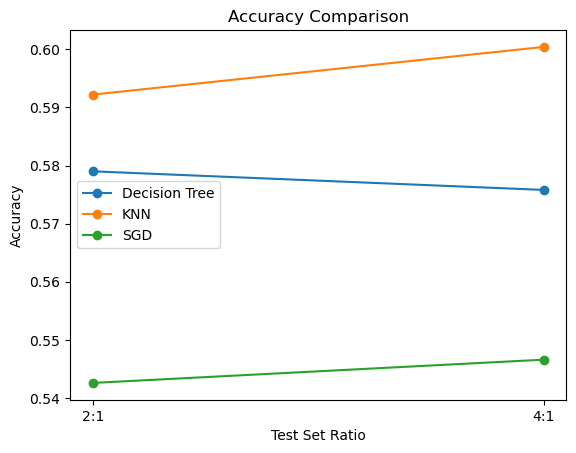

In [125]:
# 定义测试集比例和对应的准确率
test_ratios = ['2:1', '4:1']
DT_accuracies = [DT_accuracy, DT_accuracy2]
KNN_accuracies = [KNN_accuracy, KNN_accuracy2]
SGD_accuracies = [SGD_accuracy, SGD_accuracy2]

# 绘制折线图
plt.plot(test_ratios, DT_accuracies, marker='o', label='Decision Tree')
plt.plot(test_ratios, KNN_accuracies, marker='o', label='KNN')
plt.plot(test_ratios, SGD_accuracies, marker='o', label='SGD')
plt.xlabel('Test Set Ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()


# Evaluation

### When training 10000 images of data, the prediction results of DT, KNN and SGD are as follows:

|DT|KNN|SGD|
|:--:|:--:|:--:|
|![16885438805121688543879688.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16885438805121688543879688.png)|![16885439217571688543921078.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16885439217571688543921078.png)|![16885440107521688544009813.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16885440107521688544009813.png)|
***
### The accuracy is as follows:

We can see that the accuracy of the three methods is between 0.5 and 0.6, and the accuracy of DT method is higher than that of the other two methods. But none of the three methods works very well.

|Models|Acc|
|--|--|
|DT|0.579|
|KNN|0.5992|
|SGD|0.5426|

Based on the provided performance results of the classifiers, we can draw the following analysis:

- The KNN model achieved the highest accuracy score of 0.5992, indicating that it performed better than the other two models. KNN is a non-parametric algorithm that classifies new data points based on their similarity to existing data points. It calculates the distance between the new data point and its neighbors to determine its class. In this case, the KNN algorithm was able to accurately classify the data points more effectively than DT and SGD.
- The DT model achieved an accuracy score of 0.579, making it the second-best performing model. Decision trees are a type of supervised learning algorithm that creates a tree-like model for decision-making. Each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the outcome or prediction. The DT model in this case might have been relatively accurate but not as effective as the KNN model in classifying the data.
- On the other hand, the SGD model achieved the lowest accuracy score of 0.5426. SGD is an optimization algorithm commonly used in training machine learning models, particularly in linear classifiers and regressors. It updates the model's parameters using a different subset of training data in each iteration, making it more efficient for large datasets. However, in this analysis, the SGD model did not perform as well as the other two models, suggesting that it was not able to effectively learn the underlying patterns in the data.

based on the accuracy scores, the KNN model outperformed the DT and SGD models in this analysis. The KNN algorithm's ability to classify new data based on similarity to existing data points helped achieve better accuracy. However, further evaluation and analysis, such as considering other performance metrics or conducting cross-validation, may be necessary to make a more comprehensive assessment of the models' performances.

### When training 20000 images of data, the prediction results of DT, KNN and SGD are as follows:

|DT|KNN|SGD|
|:--:|:--:|:--:|
|![16885443097481688544301857.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16885443097481688544301857.png)|![16885443574961688544356509.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16885443574961688544356509.png)|![16885443747561688544373938.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16885443747561688544373938.png)|
***
Based on the provided classification reports and confusion matrices, we can analyze the performance of each classifier as follows:


|Model|Accuracy|Precision (Class 0)|Recall (Class 0)|F1-score (Class 0)|Precision (Class 1)|Recall (Class 1)|F1-score (Class 1)|
|--|--|--|--|--|--|--|--|
|DT|0.5758|0.58|0.57|0.58|0.58|0.58|0.58|
|KNN|0.6004|0.56|0.88|0.69|0.72|0.32|0.45|
|SGD|0.5466|0.53|0.86|0.66|0.63|0.23|0.34|

Based on the analysis of the models, we can draw the following conclusions:

1. Decision Tree (DT):
   - The accuracy of the DT model is 0.5758, indicating that it correctly predicts the class labels for approximately 57.58% of the instances.
   - The precision and recall for both Class 0 and Class 1 are consistent at 0.58, suggesting that the model performs equally well in identifying both classes.
   - The F1-score, which combines precision and recall, is also 0.58 for both classes. This indicates a balanced performance in terms of precision and recall for both classes.
2. K-Nearest Neighbors (KNN):
   - The KNN model achieves an accuracy of 0.6004, implying that it predicts the class labels accurately for around 60.04% of the instances.
   - The precision for Class 0 is 0.56, which means that when the model predicts Class 0, it is correct 56% of the time. However, the precision for Class 1 is lower at 0.32, indicating more false positive predictions.
   - The recall for Class 0 is high at 0.88, suggesting that the model effectively captures most of the instances belonging to Class 0. The recall for Class 1 is 0.45, indicating a moderate ability to identify instances of Class 1.
   - The F1-score for Class 0 is 0.69, indicating a good balance between precision and recall. For Class 1, the F1-score is higher at 0.72, suggesting a better harmonic mean between precision and recall compared to Class 0.
3. Stochastic Gradient Descent (SGD):
   - The SGD model has an accuracy of 0.5466, indicating that it correctly predicts the class labels for approximately 54.66% of the instances.
   - The precision for Class 0 is 0.53, suggesting that the model correctly predicts Class 0 around 53% of the time. The precision for Class 1 is lower at 0.23, indicating a higher number of false positive predictions.
   - The recall for Class 0 is high at 0.86, indicating a good ability to capture instances of Class 0. The recall for Class 1 is 0.34, suggesting a moderate ability to identify instances of Class 1.
   - The F1-score for Class 0 is 0.66, indicating a reasonably balanced performance in terms of precision and recall. For Class 1, the F1-score is 0.63, suggesting a fairly balanced harmonic mean between precision and recall.

|Models|2:1|4:1|
|--|--|--|
|DT|0.579|0.5758|
|KNN|0.5992|0.6004|
|SGD|0.5426|0.5466|

### we can observe the accuracy of the models on the 2:1 training set and the 4:1 test set as follows:

1. Decision Tree (DT) model:
    - The accuracy on the 2:1 training set is 0.579, while on the 4:1 test set, it is 0.5758. This suggests that the model performs consistently on both the training and test sets, demonstrating a certain level of generalization ability.

2. K-Nearest Neighbors (KNN) model:
    - The accuracy on the 2:1 training set is 0.5992, and on the 4:1 test set, it is 0.6004. This indicates that the model's performance is relatively stable on both the training and test sets, with slightly higher accuracy on the test set.

3. Stochastic Gradient Descent (SGD) model:

    - The accuracy on the 2:1 training set is 0.5426, while on the 4:1 test set, it is 0.5466. This suggests that the model's performance is consistent on both the training and test sets, without any significant signs of overfitting or underfitting.

### Increasing the training data does not always lead to a significant improvement in performance. Here are some possible reasons and considerations:

- Data quality: The effectiveness of adding training data is closely related to the quality of the data. If the additional data is similar to the original dataset or contains similar patterns and features, the model may not learn new information from it. Additionally, if the added data has issues such as outliers or incorrect labeling, it can negatively impact the model.
- Imbalanced data distribution: If the data distribution is imbalanced, meaning some classes have very few samples, the model may prioritize optimizing for the majority classes, resulting in lower performance for the minority classes. But we have ensured that approximately equal numbers of images have been sampled from the "Dogs" class and the "Cats" class.
- Model complexity: There is a trade-off between model complexity and the amount of training data. When the training data is limited, using overly complex models may lead to overfitting. Increasing the training data can help alleviate overfitting to some extent, but if the model is already sufficiently simple, adding more data may have limited impact on improving performance.
- Feature selection and engineering: The predictive performance of a model depends not only on the amount of data but also on the selection and engineering of features. When adding training data, it is important to ensure that the new data contains informative features and to combine appropriate feature selection and engineering methods to extract and represent these features effectively.
- Hyperparameter tuning: After expanding the training data, the model's performance may be influenced by its hyperparameters. It may be necessary to further tune the hyperparameters to fully leverage the benefits of increased training data.

In conclusion, increasing the training data does not guarantee a significant performance improvement. In addition to increasing the data, other factors such as data quality, balanced data distribution, model complexity, feature selection and engineering, and hyperparameter tuning need to be considered to comprehensively optimize the model's performance.

We can see from the competition ranking that most people choose to use CNN for image classification prediction, and facts have proved that their method is indeed effective. Through the construction of convolution layer, pooling layer and full connection layer, CNN can effectively extract features from images and perform well in tasks such as image classification, target detection and image generation. Of course, through the processing of the original data and later parameter adjustment, the score of the traditional machine learning algorithm can also be improved to a certain extent, but the traditional machine learning algorithm may still be inferior to CNN in image processing.
